#### Data analysis notebook

Reads in the data files and plot results



In [1]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
manager = RunManager("../scripts/config.json")
display(manager.display_all_runs(include_deleted=False))

,id,particle,ion,energy,sourceVolume,outputDir,outputFile,numEvents,numJobs,randomSeed,settingsFile,status
0,run_01,ion,11 22,,,/data/xenon/acolijn/G4XamsSim/20240829_145226,na22,10000000,10,99848,settings.json,active


In [3]:
# cut on the global event variables
cut = lambda data: (data['ncomp'] + data['nphot'] == 1) & (data['type'] == 0) & (data['e'] < 1500.) 
# additional cuts on the clusters
cut_hit = lambda data: (data['r'] < 1050.) & (np.abs(data['zh']) < 1050.) 

std = Geant4Analyzer("run_01", first_only=True)
std.preprocess_data(cut=cut, cut_hit=cut_hit)


Loading /data/xenon/acolijn/G4XamsSim/20240829_145226/na22_1.root
Data loaded from 1 files


integral = 23362.0


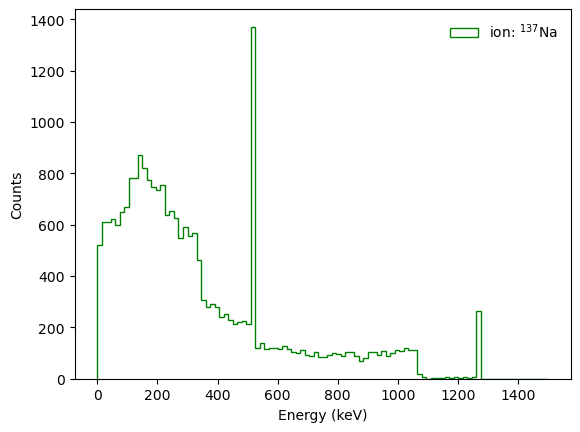

<Axes: xlabel='Energy (keV)', ylabel='Counts'>

In [4]:
std.plot_histogram("e", bins=100, range=(0, 1500))

Text(0, 0.5, 'z (mm)')

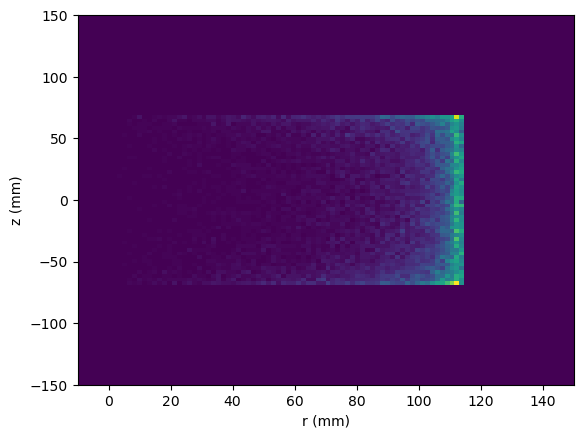

In [5]:
h2 = plt.hist2d(std.data['r'], std.data['zh'], bins=100, range=((-10, 150), (-150, 150)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")

Text(0, 0.5, 'y (mm)')

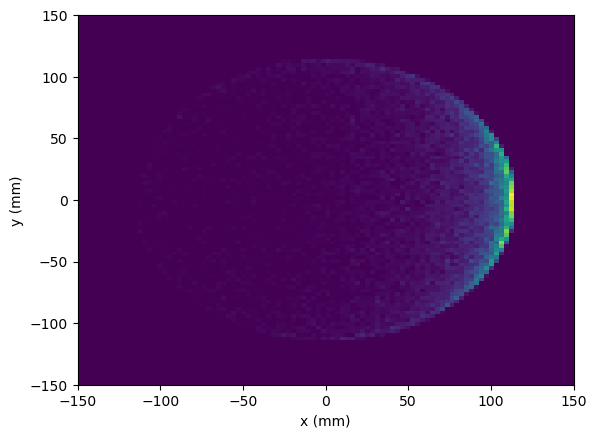

In [12]:
h2 = plt.hist2d(std.data['xh'], std.data['yh'], bins=100, range=((-150, 150), (-150, 150)))
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

In [1]:
from mendeleev import element

In [2]:
el = element(11)

In [5]:
el.symbol

'Na'